In [1]:
rm(list=ls())

#svm을 R로 분석 해 보면, 먼저 R에서 svm에 관한 패키지는 다음과 같이 3개가 있다.
#e1071 : C++로 작성된 오픈소스 SVM 프로그램을 라이브러리를 R로 구현
#klaR : 도르트문트 기술대학 통계학과의 패키지로 알고리즘을 구현.
#kernlab : R로 개발된 패키지로, 쉽게 변경할 수 있고 모든 면을 자세히 살펴볼 수 있다. 
#2가지에 대해서만 실습!

# install.packages("e1071")
install.packages("kernlab")

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ewon\AppData\Local\Temp\RtmpKS6Tkt\downloaded_packages


In [2]:
library(e1071)

#e1071라이브러리에서는 svm이라는 함수를 쓴다.
#default Kernerl 값은 radial 이고
#cost는 과적합을 막는 정도를 지정하는 파라미터 이다.
#즉 cost는 잘못 분류하면 얼마만큼의 비용을 지불할 것인지 결정하는 것이다.

In [2]:
#데이터 만들기

#시드 고정
set.seed(0801)

#matrix형태로 저장

x=matrix(rnorm(200),100,2)
group=ifelse(apply(x*x,1,sum)<=1.4,1,2)
#apply(var, 1:row;2:col, function)
#ifelse(logic , T일때, F일때 )

table(group)

group
 1  2 
45 55 


Call:
svm(formula = y ~ x, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  41

 ( 20 21 )


Number of Classes:  2 

Levels: 
 1 2




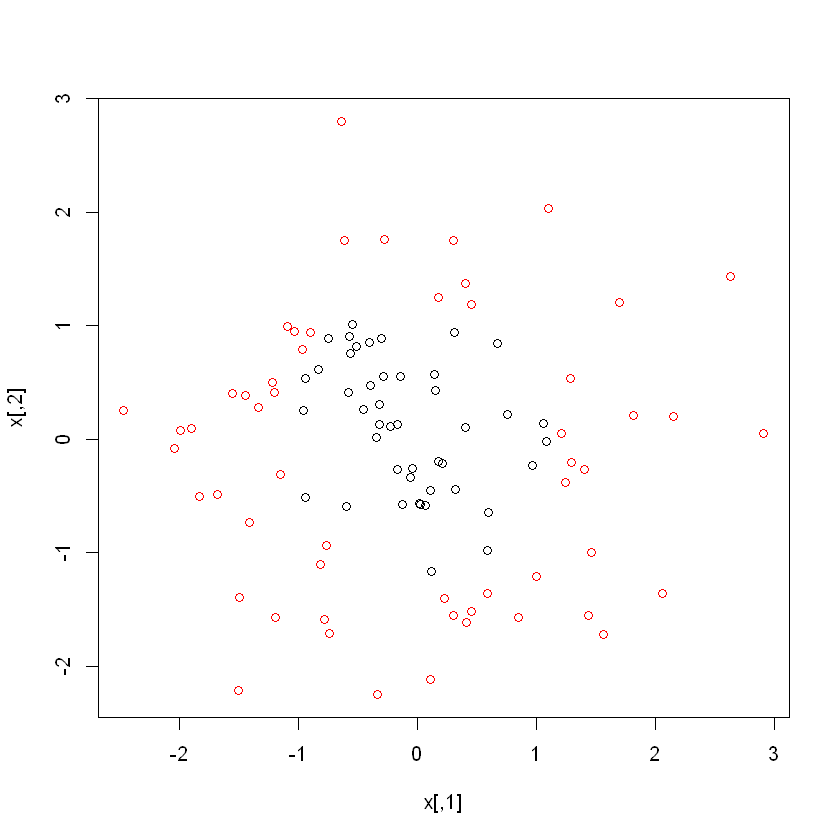

In [4]:
#x의 열별로 색을 위에서 붙인 라벨
plot(x,col=group)

library(e1071)
y=as.factor(group)

svm.model=svm(y~x,kernel='radial')
# ?svm
summary(svm.model)

In [ ]:
#시각화하기

#그래프 창 활성화
windows(height=10,width=10)

plot(x,pch=c(20,21)[svm.model$fitted],col=c('blue','red')[svm.model$fitted],xlim=c(-3,3),ylim=c(-3,3),xlab='x1',ylab='x2',main="비선형 SVM 예측값 시각화")

In [6]:
#Acc 확인하기
sum(group==svm.model$fitted)/length(group)

[1] 0.95

In [3]:
######################################

####예제2 스팸메일

library(e1071)
library(kernlab)

In [4]:
#데이터 불러오기
data(spam)
str(spam)
dim(spam)
#단어 및 기호의 빈도,특성이 변수값으로 들어가있음

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

[1] 4601   58

In [5]:
svm.model<- svm(type~., data=spam, gamma=1, cost=1) #gamma랑 cost parameter를 둘 다 1로 잡은 것.

In [6]:
addmargins(table(spam$type, svm.model$fitted)) #sum까지 같이 보려면 이렇게~!~!

#엄청 좋다. but?

,nonspam,spam,Sum
nonspam,2788,0,2788
spam,27,1786,1813
Sum,2815,1786,4601


In [7]:
# train/test 분리

n<-nrow(spam)
sub<-sample(1:n,round(0.7*n))
spam.train<-spam[sub,]
spam.test<-spam[-sub,]

In [8]:
svm.model.1<- svm(type~.,data=spam.train, gamma=1, cost=1)
svm.predict.2<-predict(svm.model.1,newdata=spam.test)

addmargins(table(spam.test$type,svm.predict.2)) #위와 똑같이 sum 한번에 보려고 addmargins 하는것!

,nonspam,spam,Sum
nonspam,837,2,839
spam,287,254,541
Sum,1124,256,1380


In [9]:
#총오류율 얼마?
(2+287)/1380

[1] 0.2094203

In [ ]:
####파라미터 튜닝해보기
#위의 예제들에선 gamma=1 ,cost=1인 경우로 대부분 해봤다.

#튜닝하는 함수가 있음!
#tune.svm( )
#SVM 모형의 최적 파라미터를 찾아준다.

#대신 커널은 설정해야함!!

#(10-fold cross-validation) 방법으로 튜닝해준다.
?tune

tune.svm<- tune(svm,type~., data=spam.train,
                kernel="radial", ranges =list(gamma=c(0.1,1,10),
                                              cost=c(0.1,1,10)))
#각각 gamma와 cost의 후보임! 커널 함수 자체에 대해 이해가 필요하다고 판단.
#경험적으로..

#꼭 세 개 아니어도 괜찮고 더 많아도 상관없습니당!

summary(tune.svm)

In [6]:
####예제 3 iris data

model <- svm(Species~., data=iris)
model


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51


In [7]:
pred <- predict(model, iris[, -5])

In [8]:
#model로 iris를 예즉한 값을 pred란 변수에 저장한다.
table(pred, iris$Species)

#table을 통해 비교한면 된다.

            
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

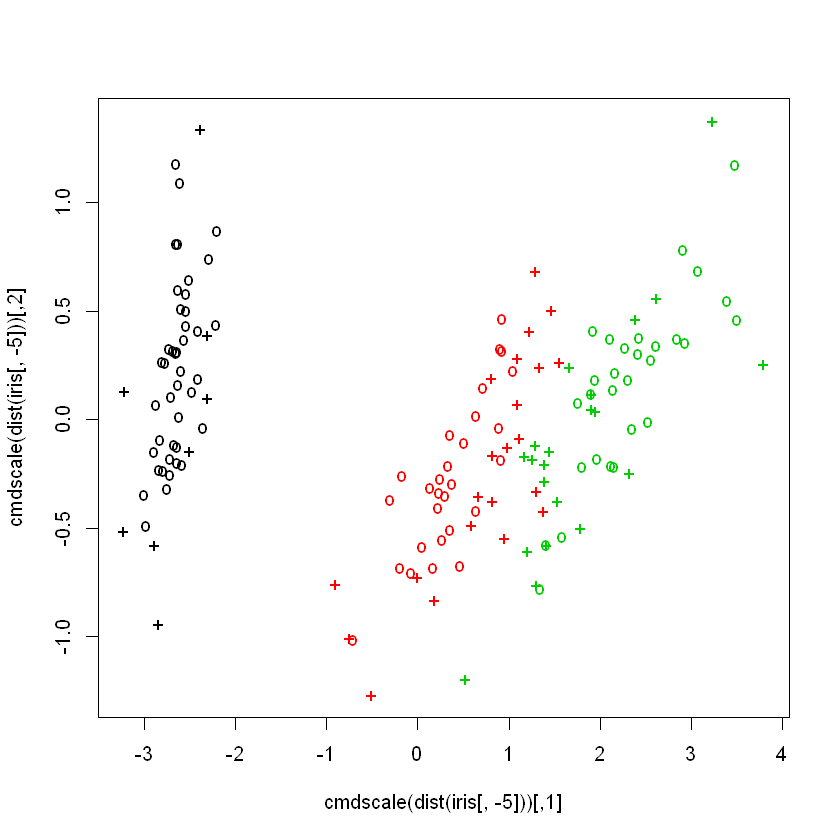

In [9]:
plot(cmdscale(dist(iris[,-5])), col = as.integer(iris[,5]),
     
     pch = c("o","+")[1:150 %in% model$index + 1])



#예측한 model을 plot함수로 그리는데, support vector는 + 모양으로, 아닌거들은 O로 나타낸다

In [ ]:
#다음은 kernlab라이브러리를 살펴보자
#ksvm라는 함수를 사용하고, irist 데이터를 가지고 하면,
library(kernlab)

In [10]:
irismodel <- ksvm(Species ~ ., data = iris,
  
                  type = "C-bsvc", kernel = "rbfdot",
                  
                  kpar = list(sigma = 0.1), C = 10,
                  
                  prob.model = TRUE)

In [ ]:
#이번에는 다양한 옵션값들을 주고 model 생성

predict(irismodel, iris[c(3, 10, 56, 68, 107, 120), -5], type = "probabilities")

predict(irismodel, iris[c(3, 10, 56, 68, 107, 120), -5], type = "decision")

predict(irismodel, iris[c(3, 10, 56, 68, 107, 120), -5])



#그리고 그값들을 type별로 예측해보면 반환값이 다르다는것을 알수있다.
#또한 내가 마음대로 kernel을 만들어 줄수 있는데,

k <- function(x, y) {
  
  (sum(x * y) + 1) * exp(0.001 * sum((x - y)^2))
  
}

class(k) <- "kernel"


#이번에는 다른 data를 가지고 써보자.
data("promotergene")
str(promotergene)
gene <- ksvm(Class ~ ., data = promotergene, kernel = k, C = 10, cross = 5)



#이렇게 내가 임의의 커널을 만들어 넣어 줄수도 있다





##############+++ 
#불러오기
data(iris)

#모델 적합
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = iris, kernel = "linear")
# the + are support vectors
plot(iris$Sepal.Length, iris$Sepal.Width, col = as.integer(iris[, 5]), 
     pch = c("o","+")[1:150 %in% svm.model$index + 1], cex = 2, 
     xlab = "Sepal length", ylab = "Sepal width")

plot(svm.model, iris, Sepal.Width ~ Sepal.Length, 
     slice = list(sepal.width = 1, sepal.length = 2))

svm.pred  <- predict(svm.model, iris[,-5]) 
table(pred = svm.pred, true = iris[,5]) # show the confusion matrix